# Машинное обучение, DS-поток
## Задание 1.5


**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot` (ноутбуки `[0]_task8_train_model.ipynb` и `[1]_task8_modules.ipynb`).
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Теоретические задачи необходимо оформить в LaTeX/markdown или же прислать фотку в правильной ориентации рукописного решения, **где все четко видно**.

**Баллы за задание:**

* Реализация модулей — 10 баллов.
* Применение на синтетических данных — 5 баллов.

<h1 align=center>
    Welcome в Глубокое обучение!
</h1>

<img src="https://www.analyticsinsight.net/wp-content/uploads/2019/01/AutoML-1024x695.jpg" width=500>

В этом домашнем задании вам предстоит самостоятельно реализовать самые важные компоненты нейросети, **используя только `NumPy`**. 

Ноутбуков в задании много (целых 3), однако большая часть кода написана за вас.😉 Вам предстоит лишь  разобраться в уже написанном коде, понять, как работют некоторые важные компоненты нейронных сетей и написать недстающие строки кода, чтобы все заработало.

Структура задания подразумевает выполнение 3-х `jupyter notebook`'ов:

**`[0]_task8_train_model.ipynb`**: текущий ноутбук. В нем поясняется суть задания, описаны остальные ноутбуки и именно этот ноутбук нужно запустить, когда все слои уже реализованы;

**`[1]_task8_modules.ipynb`**: ноутбук, в котором нужно непосредственно реализовать слои нейронной сети. А именно:

В этом ноутбуке вам предстоит реализовать слои нейронной сети, используя только библиотеку NumPy:

> Базовые концепции:
- [x] `Module`     $-$ абстрактный класс для компонент нейронной сети;
- [ ] *(2 балла)* `Sequential` $-$ класс, содержащий в себе последовательность объектов класса `Module`.

> Слои:
- [ ] *(2 балла)* `Linear`     $-$ линейный слой;
- [ ] *(2 балла)* `SoftMax`    $-$ слой, вычисляющий операцию *softmax*;
- [x] `LogSoftMax` $-$ слой, вычисляющий операцию *log(softmax)*;

> Функции активации (тоже являются слоями, но выделены в отдельную секцию для удобства):
- [ ] *(1 балл)* `ReLU`      $-$ функция активации *Rectified Linear Unit*;

> Функции потерь:
- [x] `Criterion`  $-$ абстрактный класс для функций потерь;
- [ ] *(1 балл)* `NLLCriterionUnstable` $-$ negative log-likelihood функция потерь (нестабильная версия, возможны числовые переполнения);
- [x] *(1 балл)* `NLLCriterion` $-$ negative log-likelihood функция потерь (стабильная версия).

> Оптимизаторы:
- [ ] *(1 балла)* `SGD`  $-$ алгоритм стохастического градиентного спуска.


**Галочками** помечены те слои, которые **уже реализованы за вас**. Таким образом, задание состоит в реализации оставшихся слоёв (мы заботимся о вашем здоровье 🍀). 

**`[2]_task8_test_modules.ipynb`**: ноутбук с юнит-тестами, который следует использовать для отладки ноутбука
**`[1]_task8_modules.ipynb`**. В ноутбуке с тестами ничего писать не надо (чтобы не портить себе жизнь) и отправлять в бот его тоже не надо)

**Всего за задание можно получить:**
- **10 баллов** за `[1]task8_modules.ipynb`
- **5 баллов** за `[0]task8_train_model.ipynb` (этот ноутбук)
- Суммарно: **15 баллов**

Задание на следующей неделе будет похожим на это. Нужно будет реализовть чуть более сложные модули и применить полученные модули для создания более продвинутой модели. 

# 1. Использование NumPy-фреймворка 5 баллов

In [1]:
# Путь к папке с заданием
path_to_dir: str = 'ColabNotebooks/ML_DS_data/task5/'
# Путь к файлу с модулями
path_to_modules_notebook = path_to_dir + "[1]_task8_modules.ipynb"

In [2]:
# В Google Colab подключаемся к диску
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')
    path_to_modules_notebook = "drive/MyDrive/" + path_to_modules_notebook

Следующая ячейка делает `from [1]_task8_modules.ipynb import *`, таким образом позволяя этому ноутбуку видеть все слои:

In [3]:
%run $path_to_modules_notebook

Exception: File `'ColabNotebooks/ML_DS_data/task5/[1]_task8_modules.ipynb.py'` not found.

После того, как все слои в `[1]_task8_modules.ipynb` протестированы и работают корректно (напомним, что для этого нужно пройти все `assert`'ы в **`[2]_task8_test_modules.ipynb`**), проверим нейросеть на наборах синтетических данных.

In [ ]:
import time
from time import time, sleep
import warnings

from itertools import cycle, islice

from IPython import display

import numpy as np
import pandas as pd

import scipy.stats as sps

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import seaborn as sns
sns.set(font_scale=1.5)

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import seaborn as sns

from sklearn import cluster, datasets
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
from torch.optim import SGD as torch_sgd

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

## Синтетические данные (5 баллов = 3 + 2)

### Линейно разделимая выборка (3 балла)

Обучим однослойную нейронную сеть решать линейно-разделимую классификацию на 2 класса:

In [ ]:
n_samples = 1024
n_classes = 2

varied_blobs = datasets.make_blobs(
    n_samples=n_samples,
    n_features=2,
    centers=n_classes,
    cluster_std=[1.0, 2.5], 
    random_state=RANDOM_SEED
)

sample, labels = varied_blobs

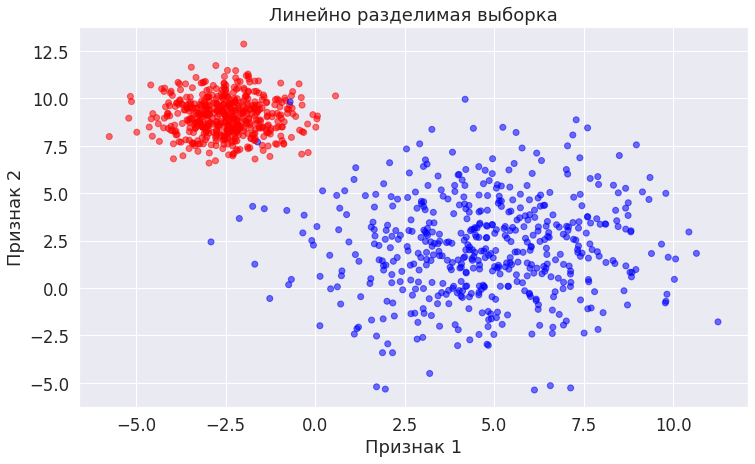

In [ ]:
plt.figure(figsize=(12,7))
plt.title('Линейно разделимая выборка')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.scatter(sample[:,0], sample[:,1], c=labels, cmap=cm_bright, alpha=0.55);

Генератор батчей (помним, что нейросети обучаются итеративно $-$ по батчам):

In [ ]:
def train_generator(sample, labels, batch_size):
    '''
    Генератор батчей. 
    На каждом шаге возвращает `batch_size` объектов из `sample` и их 
    меток из `labels`.
    '''
    n_samples = sample.shape[0]
    # Перемешиваем в случайном порядке в начале эпохи
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    # Обратите внимание на yield вместо return
    # (если раньше не сталкивались с генераторами)
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        batch_idx = indices[start:end]
        yield sample[batch_idx], labels[batch_idx]

Функция для удобного обучения модели:

In [ ]:
def train_model(
    model, 
    sample, y,
    criterion,
    opt_params, 
    opt_state, 
    n_epoch, 
    batch_size
):
    '''
    Обучает модель из вашего мини-фреймворка. 
    Возвращает обученную модель, историю значений функции потерь 
    и метрики качества.
    
    :param `model`: модель из вашего мини-фреймворка
    :param `sample`: матрица объектов
    :param `y`: вектор истинных меток объектов
    :param `criterion`: функция потерь
    :param `opt_params`: гиперпараметры оптимизатора
    :param `opt_state`: текущая информация о градиентах, 
                        хранящаяся в оптимизаторе
    :param `n_epoch`: количество эпох
    :param `batch_size`: размер одного батча
    '''
    
    loss_history = []

    for i in range(n_epoch):
        for x_batch, y_batch in train_generator(sample, y, batch_size):
            # Обнуляем градиенты с предыдущей итерации
            model.zero_grad_params()

            # Forward pass
            predictions = model.forward(x_batch)
            loss = criterion.forward(predictions, y_batch)
            # Backward pass
            grad_last = criterion.backward(predictions, y_batch)
            model.backward(x_batch, grad_last)
            
            # Обновление весов
            SGD(model.get_parameters(), 
                model.get_grad_params(), 
                opt_params,
                opt_state)
            loss_history.append(loss)

        display.clear_output(wait=True)
        
        plt.figure(figsize=(8, 6))
        plt.title("Функция потерь на train")
        plt.xlabel("итерация")
        plt.ylabel("лосс")
        plt.plot(loss_history, 'b')
        plt.show()
        print('Current loss: %f' % loss)
    
    return model, loss_history

Построим однослойную нейросеть для классификации: размер слоя $2 \times 2$, так как 2 признака и 2 класса. В качестве последнего слоя рекомендуется использовать `LogSoftMax`.

In [ ]:
net = Sequential()
net.add(Linear(2,2))
net.add(LogSoftMax())

print(net)

Linear 2 -> 2
LogSoftMax



Объявим оптимизируемую функцию потерь и гиперпаарметры:

In [ ]:
# Функция потерь
criterion = NLLCriterion()

# Гиперпараметры оптимизатора
optimizer_config = {'learning_rate' : 1e-2}
optimizer_state = {}

# Гиперпараметры цикла обучения и генератора
n_epoch = 50
batch_size = 128

Проверим, что кодирование производится верно:

In [ ]:
y = np.hstack([1-labels[:,None], labels[:,None]])
print(y.shape)
print(labels[:10])
print(y[:10])

(1024, 2)
[0 1 1 0 1 1 1 1 1 0]
[[1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]]


Обучим модель с помощью функции `train_model`:

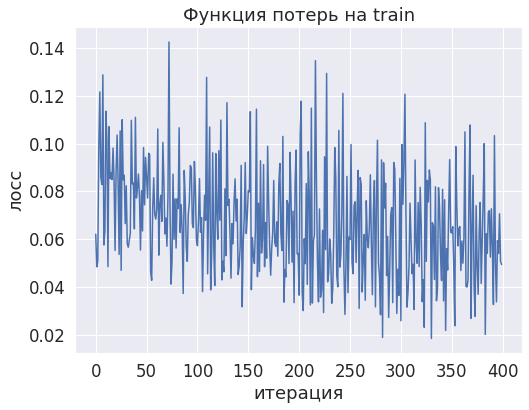

Current loss: 0.049415


In [ ]:
net, loss_history = train_model(
    net, 
    sample, y, 
    criterion,
    optimizer_config, 
    optimizer_state,
    n_epoch,
    batch_size
)

**Упражнение:** Попробуйте поменять гиперпараметр `learning_rate` в `optimizer_config` на 1е-1, 1е-2, 1е-3 и 1е-4. Как это влияет на обучение?

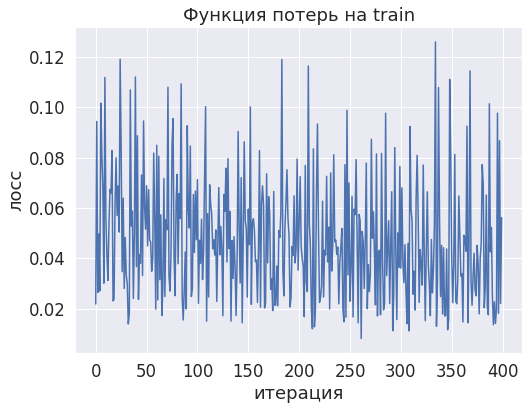

Current loss: 0.056204


In [ ]:
# Гиперпараметры оптимизатора
optimizer_config = {'learning_rate' : 1e-1}

net, loss_history = train_model(
    net, 
    sample, y, 
    criterion,
    optimizer_config, 
    optimizer_state,
    n_epoch,
    batch_size
)

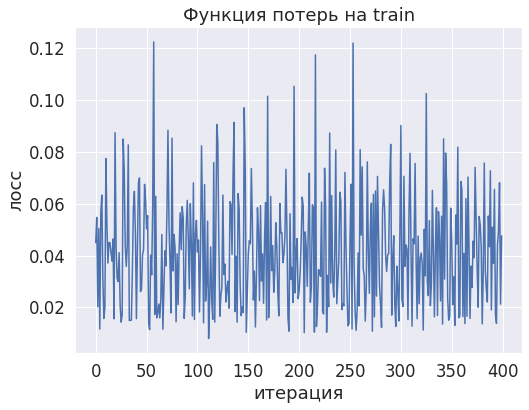

Current loss: 0.047629


In [ ]:
# Гиперпараметры оптимизатора
optimizer_config = {'learning_rate' : 1e-2}

net, loss_history = train_model(
    net, 
    sample, y, 
    criterion,
    optimizer_config, 
    optimizer_state,
    n_epoch,
    batch_size
)

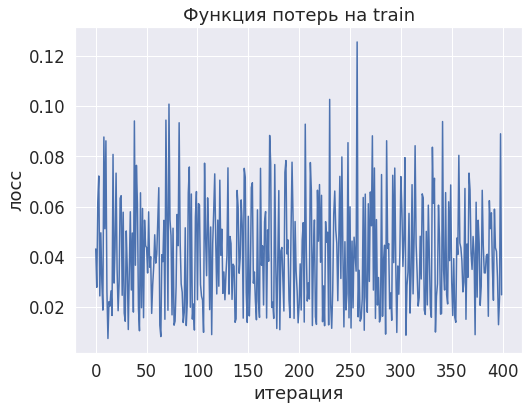

Current loss: 0.024753


In [ ]:
# Гиперпараметры оптимизатора
optimizer_config = {'learning_rate' : 1e-3}

net, loss_history = train_model(
    net, 
    sample, y, 
    criterion,
    optimizer_config, 
    optimizer_state,
    n_epoch,
    batch_size
)

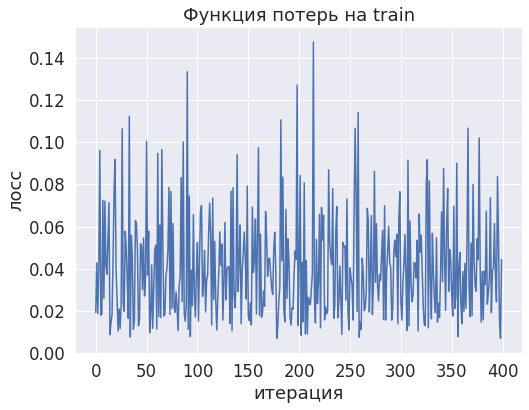

Current loss: 0.044339


In [ ]:
# Гиперпараметры оптимизатора
optimizer_config = {'learning_rate' : 1e-4}

net, loss_history = train_model(
    net, 
    sample, y, 
    criterion,
    optimizer_config, 
    optimizer_state,
    n_epoch,
    batch_size
)

Слишком больших значениях он перепрыгивает минимум, а при маленьких не успевает доходить

Батч-генератор для тестовой выборки:

In [ ]:
def generate_grid(sample, h=0.02):
    '''
    Генерирует двумерную сетку.
    '''
    x_min, x_max = sample[:, 0].min() - .5, sample[:, 0].max() + .5
    y_min, y_max = sample[:, 1].min() - .5, sample[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def test_generator(sample):
    '''
    Батч-генератор для тестовых данных (без меток).
    '''
    n_samples = sample.shape[0]
    indices = np.arange(n_samples)
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        batch_idx = indices[start:end]
        yield sample[batch_idx]

Функции для удобного тестирования модели:

In [ ]:
def test_model(model, test_sample):
    '''
    Тестирует модель на тестовой выборке.
    '''
    preds = []
    for test_batch in test_generator(test_sample):
        batch = model.forward(test_batch)
        batch = batch.argmax(axis=1).reshape(-1,1)
        preds.append(batch)
    preds = np.vstack(preds)
    return preds

In [ ]:
def plot_grid_preds(sample, labels, xx, yy, preds, title):
    '''
    Функция для удобной отрисовки предсказаний нейросети на двумерной сетке.
    '''
    plt.figure(figsize=(12,7))
    plt.title(title)
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.scatter(sample[:,0], sample[:,1], c=labels, cmap=cm_bright, alpha=0.55)
    plt.contourf(xx, yy, preds, alpha=.2, cmap=cm)
    plt.show();

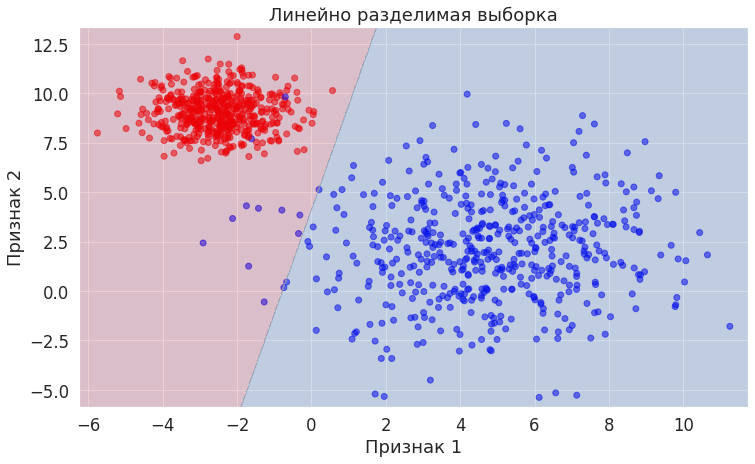

In [ ]:
xx, yy = generate_grid(sample, h=0.02)
test_sample = np.vstack((xx.ravel(), yy.ravel())).T

test_predictions = test_model(net, test_sample).reshape(xx.shape[0], xx.shape[1])
   
plot_grid_preds(
    sample, 
    labels, 
    xx, yy, 
    test_predictions, 
    'Линейно разделимая выборка'
)

Сравним с точно такой же моделью, но на PyTorch:

*Подсказка:* названия слоев идентичны, если брать их из `torch.nn`. Отличия только в оптимизаторе и названии функции потерь.

In [ ]:
net_torch = nn.Sequential()
net_torch.add_module('Linear', nn.Linear(2,2))
net_torch.add_module('Softmax', nn.LogSoftmax())

print(net_torch)

Sequential(
  (Linear): Linear(in_features=2, out_features=2, bias=True)
  (Softmax): LogSoftmax(dim=None)
)


In [ ]:
def train_model_torch(
    model, 
    sample, y,
    criterion,
    optimizer,
    n_epoch, 
    batch_size
):
    '''
    Обучает модель из PyTorch. 
    Возвращает обученную модель, историю значений функции потерь 
    и метрики качества.
    
    :param `model`: модель из PyTorch
    :param `sample`: матрица объектов
    :param `y`: вектор истинных меток объектов
    :param `criterion`: функция потерь
    :param `opt_params`: гиперпараметры оптимизатора
    :param `opt_state`: текущая информация о градиентах, 
                        хранящаяся в оптимизаторе
    :param `n_epoch`: количество эпох
    :param `batch_size`: размер одного батча
    '''
    
    loss_history = []

    for i in range(n_epoch):
        for x_batch, y_batch in train_generator(sample, y, batch_size):
            # Обнуляем градиенты с предыдущей итерации
            optimizer.zero_grad()

            # Forward pass
            predictions = model(torch.tensor(x_batch).float())
            loss = criterion(predictions, torch.tensor(y_batch))

            # Backward pass
            loss.backward()

            # Обновление весов
            optimizer.step()
            loss_history.append(loss.data)

        display.clear_output(wait=True)
        
        plt.figure(figsize=(8, 6))
        plt.title("Функция потерь на train")
        plt.xlabel("итерация")
        plt.ylabel("лосс")
        plt.plot(loss_history, 'b')
        plt.show()
        print('Current loss: %f' % loss)
    
    return model, loss_history

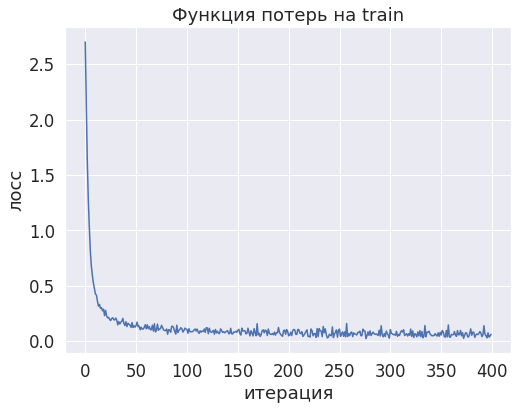

Current loss: 0.063449


In [ ]:
criterion = torch.nn.NLLLoss()
optimizer = torch_sgd(net_torch.parameters(), lr=1e-2)

net_torch, loss_history = train_model_torch(
    net_torch, sample, labels, 
    criterion,
    optimizer,
    n_epoch,
    batch_size
)

**Для самопроверки:** Значение функции потерь (лосса) должны быть прмиерно одинаковые у вашей модели и у сети из PyTorch. Каким именно на этом датасете $-$ см таблицу ниже.

|  Архитектура  | learning_rate | Значение лосса |
|-------------|---------------|-------------|
| Linear(2,2) |  1e-2         | 0.1 и ниже |

In [ ]:
def test_torch(model, test_sample):
    '''
    Тестирует модель из PyTorch на тестовой выборке.
    '''
    preds = []
    with torch.no_grad():
        for test_batch in test_generator(test_sample):
            preds_batch = model(torch.FloatTensor(test_batch))
            preds_batch = preds_batch.argmax(axis=1).reshape(-1,1)
            preds.append(preds_batch.detach().numpy())
    preds = np.vstack(preds)
    return preds

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


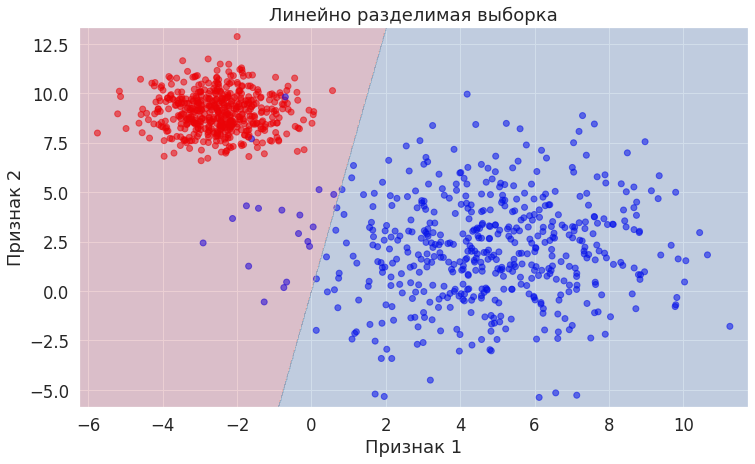

In [ ]:
xx, yy = generate_grid(sample, h=0.02)
test_sample = np.vstack((xx.ravel(), yy.ravel())).T

test_predictions = test_torch(net_torch, test_sample).reshape(xx.shape[0], xx.shape[1])
   
plot_grid_preds(
    sample, 
    labels, 
    xx, yy, 
    test_predictions, 
    'Линейно разделимая выборка'
)

Рисунки с предсказаниями должны практически совпадать у вашей модели и у модели на PyTorch.

### Вложенные окружности (2 балла)

Проверим работу нейросети на более сложной выборке, которая линейно не разделима в исходном пространстве признаков:

In [ ]:
n_samples = 1024

noisy_circles = datasets.make_circles(
    n_samples=n_samples, 
    factor=.5, 
    noise=.05
)

sample, labels = noisy_circles

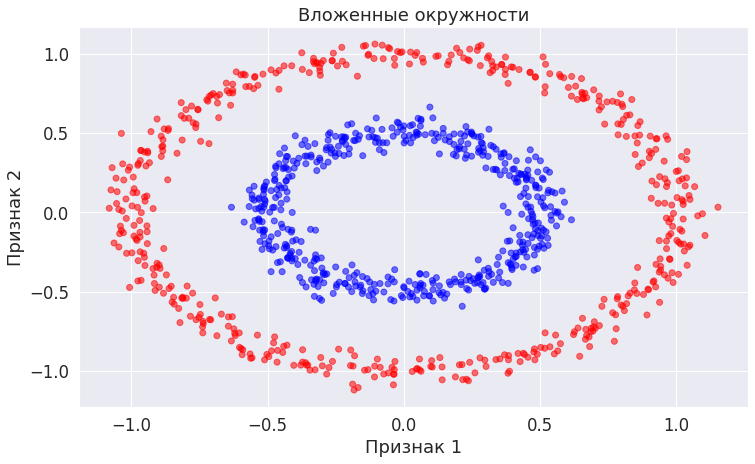

In [ ]:
plt.figure(figsize=(12,7))
plt.title('Вложенные окружности')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.scatter(sample[:,0], sample[:,1], c=labels, cmap=cm_bright, alpha=0.55);

Сначала попробуем обучить и протестировать однослойную неросеть:

In [ ]:
net = Sequential()
net.add(Linear(2,2))
net.add(LogSoftMax())
print(net)

# Функция потерь
criterion = NLLCriterion()

# Гиперпараметры оптимизатора
optimizer_config = {'learning_rate' : 1e-2}
optimizer_state = {}

# Гиперпараметры цикла обучения и генератора
n_epoch = 50
batch_size = 128

Linear 2 -> 2
LogSoftMax



In [ ]:
y = np.hstack([1-labels[:,None], labels[:,None]])
print(y.shape)
print(labels[:10])
print(y[:10])

(1024, 2)
[1 1 1 1 0 1 0 0 0 1]
[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]]


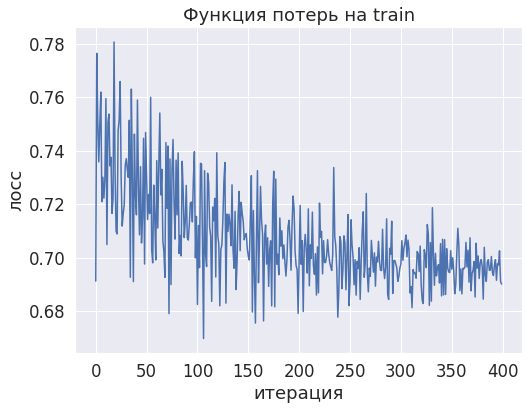

Current loss: 0.690198


In [ ]:
net, loss_history = train_model(
    net, 
    sample, y, 
    criterion,
    optimizer_config, 
    optimizer_state,
    n_epoch,
    batch_size
)

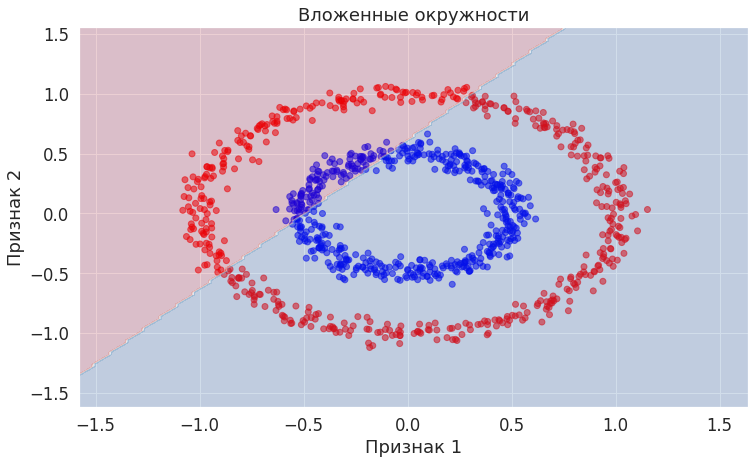

In [ ]:
xx, yy = generate_grid(sample, h=0.02)
test_sample = np.vstack((xx.ravel(), yy.ravel())).T

test_predictions = test_model(net, test_sample).reshape(xx.shape[0], xx.shape[1])

plot_grid_preds(sample, labels, xx, yy, 
                test_predictions, 'Вложенные окружности')

Вряд ли у вас получился лосс ниже 0.68 и адекватный рисунок. Это говорит о том, что один слой не может решить задачу (что логично).

Попробуем сделать **двухслойную** нейросеть. Не жалейте нейронов в скрытый слой:

*Подсказка:* не забудьте про нелинейности

In [ ]:
net = Sequential()
net.add(Linear(2,100))
net.add(ReLU())
net.add(Linear(100,2))
net.add(LogSoftMax())
print(net)

criterion = NLLCriterion()

optimizer_config = {'learning_rate' : 1e-2}
optimizer_state = {}

n_epoch = 100
batch_size = 128

y = np.hstack([1-labels[:,None], labels[:,None]])
print(y.shape)

Linear 2 -> 100
ReLU
Linear 100 -> 2
LogSoftMax

(1024, 2)


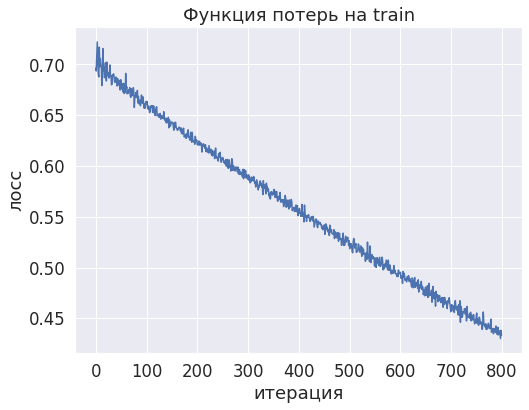

Current loss: 0.433341


In [ ]:
net, loss_history = train_model(
    net, 
    sample, y, 
    criterion,
    optimizer_config, 
    optimizer_state,
    n_epoch,
    batch_size
)

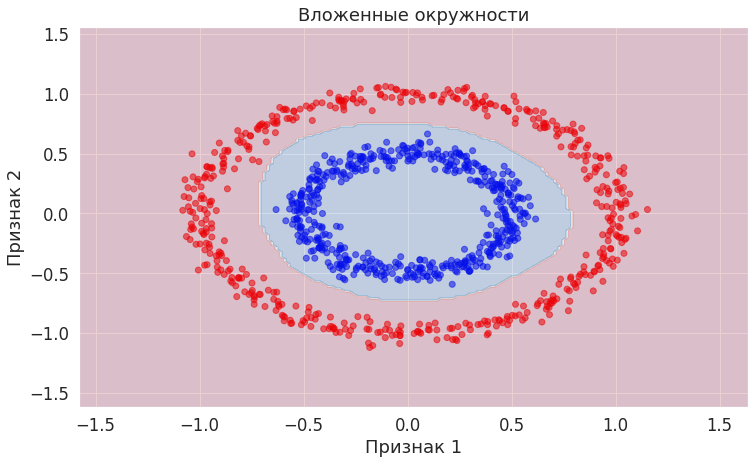

In [ ]:
xx, yy = generate_grid(sample, h=0.02)
test_sample = np.vstack((xx.ravel(), yy.ravel())).T

test_predictions = test_model(net, test_sample).reshape(xx.shape[0], xx.shape[1])

plot_grid_preds(sample, labels, xx, yy, test_predictions, 'Вложенные окружности')

**Упражнение:** Попробуйте менять количество нейронов в скрытом слое. Начиная с какого количества нейронов окружности начинают хорошо разделяться?

И снова сравним с PyTorch:

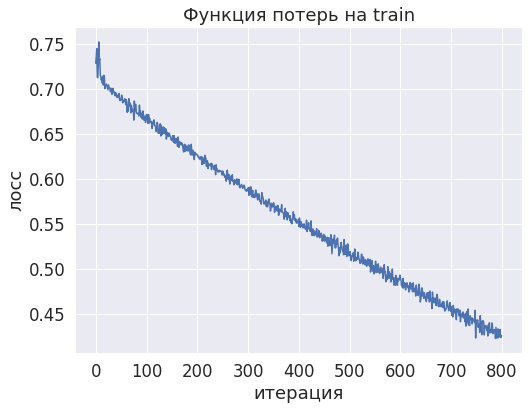

Current loss: 0.426602


In [ ]:
net_torch = nn.Sequential()
net_torch.add_module('Linear1', nn.Linear(2,100))
net_torch.add_module('ReLu', nn.ReLU())
net_torch.add_module('Linear2', nn.Linear(100,2))
net_torch.add_module('Softmax2', nn.LogSoftmax())

print(net_torch)

criterion = torch.nn.NLLLoss()
optimizer = torch_sgd(net_torch.parameters(), lr=1e-2)

net_torch, loss_history = train_model_torch(
    net_torch, sample, labels, 
    criterion,
    optimizer,
    n_epoch,
    batch_size
)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


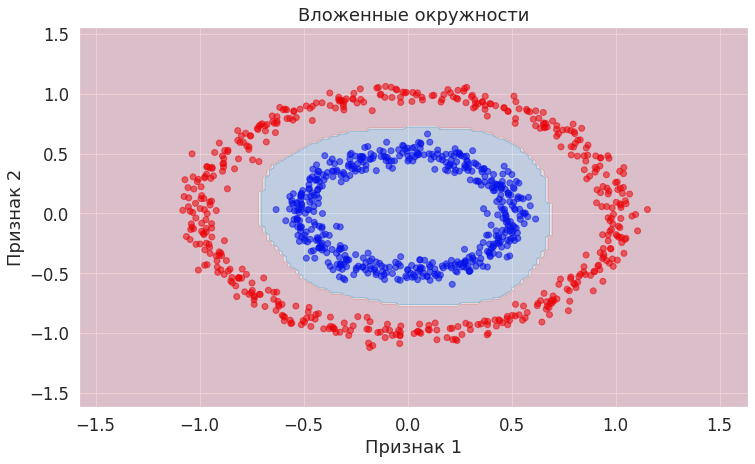

In [ ]:
xx, yy = generate_grid(sample, h=0.02)
test_sample = np.vstack((xx.ravel(), yy.ravel())).T

test_predictions = test_torch(net_torch, test_sample).reshape(xx.shape[0], xx.shape[1])

plot_grid_preds(sample, labels, xx, yy, 
                test_predictions, 'Вложенные окружности')

**Для самопроверки:** Значение функции потерь (лосса) должны быть примерно одинаковые у вашей модели и у сети из PyTorch. Каким именно на этом датасете $-$ см. таблицу ниже.

|  Архитектура  | learning_rate | Значение лосса |
|-------------|---------------|-------------|
| (2,100) -> ReLU -> (100,2) |  1e-2         | 0.45 и ниже |

Оба рисунка должны примерно совпадать и адекватно разделять окружности между собой (одна область должна быть "внутри" другой).

**Выводы:** 

Линейные модели сами по себе слшком простые, а вот композиция с нелинейными функциями вдает вполне неплохой результат.

### 2. Полезные ссылки

При составлении этого Домашнего задания авторы вдохновлялись [заданием](https://github.com/yandexdataschool/Practical_DL/tree/spring2019/homework01) из курса "Deep Learning" Школы Анализа Данных.

- [Заметки главы ИИ в Tesla Andrej Karpathy по обучению нейросетей](http://karpathy.github.io/2019/04/25/recipe/)
- [Backpropagation на brilliant.org](https://brilliant.org/wiki/backpropagation/)
- См. ссылки в `[1]task8_modules.ipynb`